### 수원시 SRI 공공데이터 활용 주정차 부족 문제 분석

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# 시스템에 따라 한글 폰트 설정
if platform.system() == 'Darwin':       # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
elif platform.system() == 'Windows':    # Windows
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:                                   # Linux (Colab 등)
    plt.rcParams['font.family'] = 'NanumGothic'

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)

In [3]:
#filepath = '/content/drive/Othercomputers/Macbook_pro/dev_macbook_sync/DEV/dev_dataProj/[team]Dacon_proj/dataset' #호윤_colab환경
#filepath = '../../git_ignore_file/dataset/dacon_suwon_policy_proposal/' #호윤_local환경
filepath = '../../git_ignore_file/dataset/suwon_sri_data' #류호윤_맥북

In [4]:
survey_2024_3 = pd.read_excel(f'{filepath}/(공개용) 2024년 3분기 패널조사 데이터(가중치).xlsx') #2024년 3분기 패널조사 데이터
survey_2024_4 = pd.read_excel(f'{filepath}/(공개용) 2024년 4분기 패널조사 데이터(가중치).xlsx')#2024년 4분기 패널조사 데이터
survey_2025_1 = pd.read_excel(f'{filepath}/(공개용) 2025년 1분기 패널조사_데이터(가중치).xlsx')#2025년 1분기 패널조사_데이터
survey_2025_2 = pd.read_excel(f'{filepath}/(공개용)2025년 2분기 패널조사_데이터(가중치).xlsx')#2025년 2분기 패널조사_데이터
city_policy_data = pd.read_excel(f'{filepath}/수원시 도시정책지표 공개 데이터.xlsx') #도시정책지표 데이터
survey_2023 = pd.read_excel(f'{filepath}/(HRC250611) 2023년 수원서베이 용역_공개용 데이터(엑셀).xlsx') #2024년 수원서베이 용역 
survey_2024 = pd.read_excel(f'{filepath}/(HRC250604) 2024년 수원서베이 용역_공개용 데이터(엑셀).xlsx')#2023년 수원서베이 용역

### 활용 가능한 교통 관련 문항 추출 및 분석
- 2025년 1분기
    - 문항
        - q8
            - ![q8](./sri_data_question/2025_1_q8.png)
        - 
- 공개용데이터 중 2023년 수원서베이 용역_공개용 데이터(엑셀)
    - 문항
        - 문16. 수원시 교통환경 - 1. 교통인프라 환경
        - 문29. 수원의 매력적인 장소(주관식)
        - 문48. 수원시 10대 비전(2. 편리하고 효율적인/ 첨단교통 도시)
        - 문50. 수원시 정책분야 중요도(2. 교통)
        - 문55-1. 수원시가 가장 잘 하고 있는 것(주관식)
        - 문55-2. 수원시가 시급히 걔선해야하는 것(주관식)

- 공개용데이터 중 2024년 수원서베이 용역_공개용 데이터(엑셀)
    - 문항
        - 문16. 귀하는 평소 이동하실 때 주로 어떠한 교통수단을 이용하십니까?
        - 문17. 다음의 수원시 교통 수단이나 시설별로 관련 인프라가 얼마나 잘 구축되어 있다고 생각하십니까?
        - 문18. 다음의 수원시 교통 수단이나 시설별로 얼마나 만족하십니까? 
        - 문62-1. 수원시가 가장 잘 하고 있는 것
        - 문62-2. 수원시가 시급히 개선해야 하는 것

In [6]:
survey_2024[0:1]

,응답자 PID,(가구용) 문0. 가구 정보 - 1. 거주 주택 유형,(가구용) 문0. 가구 정보 - 2. 1인 가구 여부,(가구용) 문0. 가구 정보 - 3. 맞벌이 여부(가구주 기준),(가구용) 문0. 응답자 성별,(가구용) 문0. 응답자 출생연도,(가구용) 문0. 총 가구원 수,(가구용) 문0. 가구원1 가구대표자(응답자)와의 관계,(가구용) 문0. 가구원1 가구대표자(응답자)와의 관계_기타,(가구용) 문0. 가구원1 성별,(가구용) 문0. 가구원1 출생년도,(가구용) 문0. 가구원1 혼인상태,(가구용) 문0. 가구원1 학력,(가구용) 문0. 가구원1 등록 장애 여부,(가구용) 문0. 가구원2 가구대표자(응답자)와의 관계,(가구용) 문0. 가구원2 가구대표자(응답자)와의 관계_기타,(가구용) 문0. 가구원2 성별,(가구용) 문0. 가구원2 출생년도,(가구용) 문0. 가구원2 혼인상태,(가구용) 문0. 가구원2 학력,(가구용) 문0. 가구원2 등록 장애 여부,(가구용) 문0. 가구원3 가구대표자(응답자)와의 관계,(가구용) 문0. 가구원3 가구대표자(응답자)와의 관계_기타,(가구용) 문0. 가구원3 성별,(가구용) 문0. 가구원3 출생년도,(가구용) 문0. 가구원3 혼인상태,(가구용) 문0. 가구원3 학력,(가구용) 문0. 가구원3 등록 장애 여부,(가구용) 문0. 가구원4 가구대표자(응답자)와의 관계,(가구용) 문0. 가구원4 가구대표자(응답자)와의 관계_기타,(가구용) 문0. 가구원4 성별,(가구용) 문0. 가구원4 출생년도,(가구용) 문0. 가구원4 혼인상태,(가구용) 문0. 가구원4 학력,(가구용) 문0. 가구원4 등록 장애 여부,(가구용) 문0. 가구원5 가구대표자(응답자)와의 관계,(가구용) 문0. 가구원5 가구대표자(응답자)와의 관계_기타,(가구용) 문0. 가구원5 성별,(가구용) 문0. 가구원5 출생년도,(가구용) 문0. 가구원5 혼인상태,(가구용) 문0. 가구원5 학력,(가구용) 문0. 가구원5 등록 장애 여부,(가구용) 문0. 가구원6 가구대표자(응답자)와의 관계,(가구용) 문0. 가구원6 가구대표자(응답자)와의 관계_기타,(가구용) 문0. 가구원6 성별,(가구용) 문0. 가구원6 출생년도,(가구용) 문0. 가구원6 혼인상태,(가구용) 문0. 가구원6 학력,(가구용) 문0. 가구원6 등록 장애 여부,(가구용) 문0. 가구원7 가구대표자(응답자)와의 관계,(가구용) 문0. 가구원7 가구대표자(응답자)와의 관계_기타,(가구용) 문0. 가구원7 성별,(가구용) 문0. 가구원7 출생년도,(가구용) 문0. 가구원7 혼인상태,(가구용) 문0. 가구원7 학력,(가구용) 문0. 가구원7 등록 장애 여부,(가구용) 문1. 귀댁에는 현재 미취학 아동이 있습니까?,(가구용) 문1. 가구 내 미취학 아동 수,(가구용) 문1-1. 미취학 아동 가구원 코드,(가구용) 문1-1. 미취학 아동 가구원 코드.1,(가구용) 문1-1. 미취학 아동 가구원 코드.2,(가구용) 문1-1. 미취학 아동1 주된 보육 방법,(가구용) 문1-1. 미취학 아동1 보육시설 유형,(가구용) 문1-1. 미취학 아동1 보육시설 만족도,(가구용) 문1-1. 미취학 아동2 주된 보육 방법,(가구용) 문1-1. 미취학 아동2 보육시설 유형,(가구용) 문1-1. 미취학 아동2 보육시설 만족도,(가구용) 문1-1. 미취학 아동3 주된 보육 방법,(가구용) 문1-1. 미취학 아동3 보육시설 유형,(가구용) 문1-1. 미취학 아동3 보육시설 만족도,(가구용) 문1-1. 미취학 아동4 주된 보육 방법,(가구용) 문1-1. 미취학 아동4 보육시설 유형,(가구용) 문1-1. 미취학 아동4 보육시설 만족도,(가구용) 문1-1. 미취학 아동5 주된 보육 방법,(가구용) 문1-1. 미취학 아동5 보육시설 유형,(가구용) 문1-1. 미취학 아동5 보육시설 만족도,(가구용) 문1-1. 미취학 아동6 주된 보육 방법,(가구용) 문1-1. 미취학 아동6 보육시설 유형,(가구용) 문1-1. 미취학 아동6 보육시설 만족도,(가구용) 문1-1. 미취학 아동7 주된 보육 방법,(가구용) 문1-1. 미취학 아동7 보육시설 유형,(가구용) 문1-1. 미취학 아동7 보육시설 만족도,(가구용) 문1-2-1. 귀댁의 미취학 아동은 현재 아동의 부모님과 함께 살고 있습니까? 해당하는 경우를 선택해 주십시오.,(가구용) 문1-2-1. 양육 및 가사 분담 비율 - 1. 부,(가구용) 문1-2-1. 양육 및 가사 분담 비율 - 2. 모,(가구용) 문1-2-1. 양육 및 가사 분담 비율 - 3. 합계,(가구용) 문2. 귀하는 수원시의 공교육 및 사교육 환경에 대해 어떻게 평가하십니까? - 1. 공교육 환경,(가구용) 문2. 귀하는 수원시의 공교육 및 사교육 환경에 대해 어떻게 평가하십니까? - 2. 사교육 환경,(가구용) 문3. 귀하는 자녀를 키우는 것과 관련하여 다음에 대해 어떻게 생각하십니까? - 1. 수원은 자녀를 키우기 좋은 육아친화적인 도시이다,(가구용) 문3. 귀하는 자녀를 키우는 것과 관련하여 다음에 대해 어떻게 생각하십니까? - 2. 나는 수원에서 자녀를 키우고 싶다,(가구용) 문3-1. 귀하가 수원에서 자녀를 키우고 싶은 이유는 무엇입니까? - 1순위,(가구용) 문3-1. 귀하가 수원에서 자녀를 키우고 싶은 이유는 무엇입니까? - 2순위,(가구용) 문3-1. 귀하가 수원에서 자녀를 키우고 싶은 이유는 무엇입니까? 주된 이유 순서대로 2순위까지 선택해 주십시오._기타,(가구용) 문3-2. 귀하가 귀하가 수원에서 자녀를 키우고 싶지 않은 이유는 무엇입니까? - 1순위,(가구용) 문3-2. 귀하가 귀하가 수원에서 자녀를 키우고 싶지 않은 이유는 무엇입니까? - 2순위,(가구용) 문3-2. 귀하가 귀하가 수원에서 자녀를 키우고 싶지 않은 이유는 무엇입니까?_기타,(가구용) 문4. 귀댁에는 현재 교육이나 일 등 사회적 활동을 거의 하지 않은 채 3개월 이상 집에만 있는 가족이 있습니까?,(가구용) 문4-1. 귀댁에서 현재 교육이나 일 등 사회적 활동을 거의 하지 않은 채 3개월 이상 집에만 있는 가족은 누구인가요?(중복 응답),(가구용) 문4-1. 귀댁에서 현재 교육이나 일 등 사회적 활동을 거의 하지 않은 채 3개월 이상 집에만 있는 가족은 누구인가요?(중복 응답).1,(가구용) 문4-1. 귀댁에서 현재 교육이나 일 등 사회적 활동을 거의 하지 않은 채 3개월 이상 집에만 있는 가족은 누구인가요?(중복 응답).2,(가구용) 문4-1. 귀댁에서 현재 교육이나 일 등 사회적 활동을 거의 하지 않은 채 3개월 이상 집에만 있는 가족은 누구인가요?(중복 응답).3,(가구용) 문4-1. 귀댁에서 현재 교육이나 일 등 사회적 활동을 거의 하지 않은 채 3개월 이상 집에만 있는 가족은 누구인가요?(중복 응답).4,(가구용) 문4-1. 귀댁에서 현재 교육이나 일 등 사회적 활동을 거의 하지 않은 채 3개월 이상 집에만 있는 가족은 누구인가요?_기타,(가구용) 문5. 귀댁에는 반려동물이 있습니까?,(가구용) 문5-1. 반려동물과 함께 생활하는 이유는 무엇입니까?,(가구용) 문5-1. 반려동물과 함께 생활하는 이유는 무엇입니까?_기타,(가구용) 문5-2. 반려동물을 키우는데 있어 수원시의 지원이 가장 필요한 부분은 무엇이라고 생각하십니까?,(가구용) 문5-2. 반려동물을 키우는데 있어 수원시의 지원이 가장 필요한 부분은 무엇이라고 생각하십니까?_기타,(가구용) 문6. 귀하가 현재 살고 있는 집의 주택유형은 무엇입니까?,(가구용) 문6. 귀하가 현재 살고 있는 집의 주택유형은 무엇입니까?_기타,(가구용) 문7. 귀하가 현재 살고 있는 집의 점유형태는 무엇입니까?,(가구용) 문7. 귀하가 현재 살고 있는 집의 점유형태는 무엇입니까?_기타,(가구용) 문8. 귀 가구의 지난 1년 동안 세전 월평균 가구소득은 얼마입니까?,(가구용) 문9. 귀댁에는 부채가 있습니까?,"(가구용) 문9-1. 부채가 있다면, 주된 이유는 무엇입니까? - 1순위","(가구용) 문9-1. 부채가 있다면, 주된 이유는 무엇입니까? - 2순위","(가구용) 문9-1. 부채가 있다면, 주된 이유는 무엇입니까?_기타",(가구용) 문10. 귀댁의 생활비 중에서

(가구대표자용) 문17. 다음의 수원시 교통 수단이나 시설별로 관련 인프라가 얼마나 잘 구축되어 있다고 생각하십니까? - 6. 주차시설	1	① 전혀 구축되어 있지 않다

(가구대표자용) 문17. 다음의 수원시 교통 수단이나 시설별로 관련 인프라가 얼마나 잘 구축되어 있다고 생각하십니까? - 6. 주차시설	2	②

(가구대표자용) 문17. 다음의 수원시 교통 수단이나 시설별로 관련 인프라가 얼마나 잘 구축되어 있다고 생각하십니까? - 6. 주차시설	3	③

(가구대표자용) 문17. 다음의 수원시 교통 수단이나 시설별로 관련 인프라가 얼마나 잘 구축되어 있다고 생각하십니까? - 6. 주차시설	4	④ 보통

(가구대표자용) 문17. 다음의 수원시 교통 수단이나 시설별로 관련 인프라가 얼마나 잘 구축되어 있다고 생각하십니까? - 6. 주차시설	5	⑤

(가구대표자용) 문17. 다음의 수원시 교통 수단이나 시설별로 관련 인프라가 얼마나 잘 구축되어 있다고 생각하십니까? - 6. 주차시설	6	⑥

(가구대표자용) 문17. 다음의 수원시 교통 수단이나 시설별로 관련 인프라가 얼마나 잘 구축되어 있다고 생각하십니까? - 6. 주차시설	7	⑦ 매우 잘 구축되어 있다

In [9]:
#(가구대표자용) 문17. 다음의 수원시 교통 수단이나 시설별로 관련 인프라가 얼마나 잘 구축되어 있다고 생각하십니까? - 6. 주차시설
survey_2024['(가구대표자용) 문17. 다음의 수원시 교통 수단이나 시설별로 관련 인프라가 얼마나 잘 구축되어 있다고 생각하십니까? - 6. 주차시설'][1:].value_counts()

(가구대표자용) 문17. 다음의 수원시 교통 수단이나 시설별로 관련 인프라가 얼마나 잘 구축되어 있다고 생각하십니까? - 6. 주차시설
4    920
5    787
3    587
6    395
2    236
7     84
1     48
Name: count, dtype: int64

In [11]:
#(가구대표자용) 문18. 다음의 수원시 교통 수단이나 시설별로 얼마나 만족하십니까? - 6. 주차시설
survey_2024['(가구대표자용) 문18. 다음의 수원시 교통 수단이나 시설별로 얼마나 만족하십니까? - 6. 주차시설'][1:].value_counts()

(가구대표자용) 문18. 다음의 수원시 교통 수단이나 시설별로 얼마나 만족하십니까? - 6. 주차시설
4    977
5    744
3    573
6    375
2    224
1     82
7     82
Name: count, dtype: int64

(가구대표자용) 문16. 귀하는 평소 이동하실 때 주로 어떠한 교통수단을 이용하십니까?
1	자차(승용차)
2	시내버스, 마을버스
3	지하철
4	택시
5	자전거(무동력)
6	개인형 이동수단(전동 휠, 킥보드, 전기자전거 등 전기 동력을 이용한 개인이동수단)
7	도보 이동
8	기타


In [12]:
#(가구대표자용) 문16. 귀하는 평소 이동하실 때 주로 어떠한 교통수단을 이용하십니까?
survey_2024['(가구대표자용) 문16. 귀하는 평소 이동하실 때 주로 어떠한 교통수단을 이용하십니까?'][1:].value_counts()

(가구대표자용) 문16. 귀하는 평소 이동하실 때 주로 어떠한 교통수단을 이용하십니까?
1    1306
2    1068
3     335
7     255
5      30
4      30
6      29
8       4
Name: count, dtype: int64

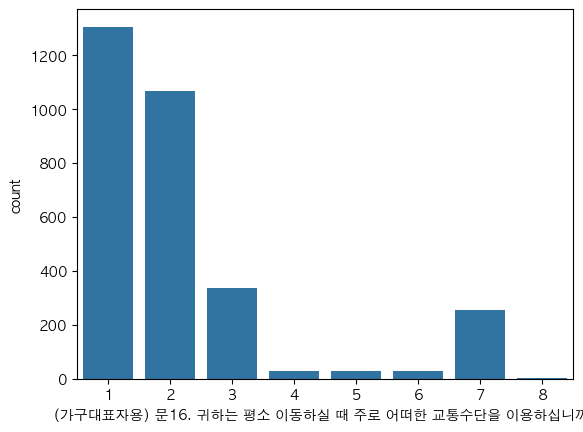

In [16]:
sns.countplot(x='(가구대표자용) 문16. 귀하는 평소 이동하실 때 주로 어떠한 교통수단을 이용하십니까?', data=survey_2024[1:])
plt.show()

/var/folders/x_/gq1xtwcs4svfp86x4f3d0vjc0000gn/T/ipykernel_70577/793873843.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rst62_2.values, y=rst62_2.index, palette='viridis')


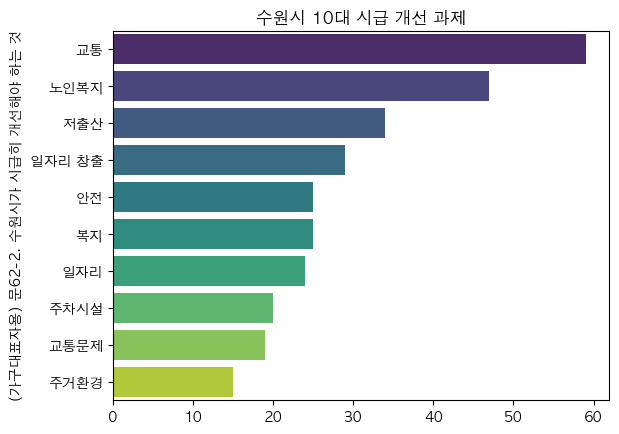

In [19]:
#(가구대표자용) 문62-2. 수원시가 시급히 개선해야 하는 것
rst62_2 = survey_2024['(가구대표자용) 문62-2. 수원시가 시급히 개선해야 하는 것'][1:].value_counts()[:10]
rst62_2.sort_values(ascending=True)
sns.barplot(x=rst62_2.values, y=rst62_2.index, palette='viridis')
plt.title('수원시 10대 시급 개선 과제')
plt.show()